<a href="https://colab.research.google.com/github/chekh/ai_tr_libs/blob/main/%D0%A3%D1%80%D0%BE%D0%B2%D0%BD%D0%B8_%D0%BF%D0%BE%D0%B4%D0%B4%D0%B5%D1%80%D0%B6%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Инсталляция библиотеки для отображения финансовых диаграмм
!pip install mpl_finance
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a12)


In [7]:
# Загрузка библиотек ai_tr_libs с github
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Support_n_Resistance/Data.py
!curl --remote-name --location https://raw.githubusercontent.com/chekh/ai_tr_libs/main/Support_n_Resistance/SupportResistance.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   746  100   746    0     0  26642      0 --:--:-- --:--:-- --:--:-- 27629
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15179  100 15179    0     0   152k      0 --:--:-- --:--:-- --:--:--  154k


In [17]:
from SupportResistance import SupportResistance
from Data import YahooData

import datetime
import time
import pandas as pd
import numpy as np

from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.dates as mdates

import warnings
#warnings.filterwarnings('ignore')
#%matplotlib notebook

In [18]:
plt.style.use('ggplot')

symbols = ['FB']

if __name__ == '__main__':
    start_all = time.perf_counter()
    
    csv = YahooData(symbols, '2008', '2019')
    csv_data = csv.get_data()


Gathering Data...

Gathering the data took: 0.6489 seconds



In [19]:
symbol = symbols[0]
sym_data = csv_data[symbol][['open', 'high', 'low', 'close']]

Calculating S/R Took:  0.0837 seconds
Getting all data took: 0.0711 seconds


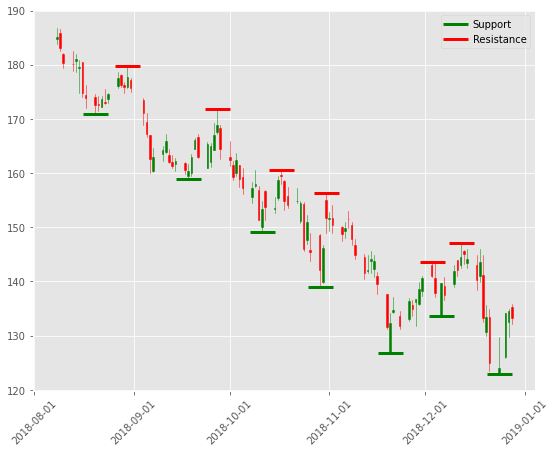

Done!
Structuring All Data Took: 0.0426 seconds


In [20]:
SR = SupportResistance(csv_data[symbol], frame = 'Daily', partial_std_amount = 2)
support_resistance = SR.main(view_graph = True, start = -100, end = -1, candle_width = 0.5)
SR_data = SR.get_all_data(support_resistance, sym_data)

In [21]:
SR_data

,open,high,low,close,Kind,PCT
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,NaN,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,NaN,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,NaN,NaN
2012-05-23,31.370001,32.500000,31.360001,32.000000,NaN,NaN
2012-05-24,32.950001,33.209999,31.770000,33.029999,NaN,NaN
...,...,...,...,...,...,...
2018-12-24,123.099998,129.740005,123.019997,124.059998,Support,0.042553
2018-12-26,126.000000,134.240005,125.889999,134.179993,NaN,NaN
2018-12-27,132.440002,134.990005,129.669998,134.520004,NaN,NaN


In [22]:
SR_data[SR_data['Kind'] == 'Resistance'].tail()

,open,high,low,close,Kind,PCT
Date,,,,,,
2018-09-27,167.550003,171.770004,167.210007,168.839996,Resistance,0.047070
2018-10-17,159.559998,160.490005,157.949997,159.419998,Resistance,0.048607
2018-10-31,155.000000,156.399994,148.960007,151.789993,Resistance,0.051648
2018-12-03,143.000000,143.679993,140.759995,141.089996,Resistance,0.052801
2018-12-12,143.080002,147.190002,142.509995,144.500000,Resistance,0.053561
